
### Problem Statement

A multinational retail company decides to embark on a campaign called **'Operation  Increase Sales and Profit' (OISP)** which focuses on increasing the sales of the company and maximising profit. 

Before the management team of the company can take any actionable decision with regards to the campagn,they want to draw the necessary insight from their 'sitting data'.

As their Data Analyst,you are presented with their four year daily sales records (**superstore data.csv**).

#### Task
Analyse the given  data and advise management on what to do to increase sales and profit as intended in the compaign.

### Steps
1. Import necessary packages
2. Load the data.
3. Inspect the data
4. Check for missing values
5. Check the data of each column
6. Check the different categories in the categorical variables
7. Take a view of the data
8. Take the descritive statistics for the numerical variables
9. Check the ditribution of the variables
10. Feature Engineering
#Create columns for:

#Unit price (sale/quantity)

#Year

#Month

#interval between the order date and the shipping date in days.


#### Importing the necessary packages

In [253]:
##Importing the necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import scipy.stats
warnings.filterwarnings('ignore')

%matplotlib inline
pd.set_option('display.max_colwidth',None)
pd.set_option('display.max_columns',None)


#### Importing the data

In [131]:
#Reading the data
#NB: Make sure you the data in your current working directory

data = pd.read_csv('superstore data.csv',parse_dates = ['Order Date','Ship Date'],encoding = 'latin1')

#### Inspect  the data 

In [132]:
#Inspecting  the data

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Row ID          51290 non-null  int64         
 1   Order ID        51290 non-null  object        
 2   Order Date      51290 non-null  datetime64[ns]
 3   Ship Date       51290 non-null  datetime64[ns]
 4   Ship Mode       51290 non-null  object        
 5   Customer ID     51290 non-null  object        
 6   Customer Name   51290 non-null  object        
 7   Segment         51290 non-null  object        
 8   City            51290 non-null  object        
 9   State           51290 non-null  object        
 10  Country         51290 non-null  object        
 11  Postal Code     9994 non-null   float64       
 12  Market          51290 non-null  object        
 13  Region          51290 non-null  object        
 14  Product ID      51290 non-null  object        
 15  Ca

In [133]:
# Taking a summary of the categocal columns alone
data.describe(include = 'object')

,Order ID,Ship Mode,Customer ID,Customer Name,Segment,City,State,Country,Market,Region,Product ID,Category,Sub-Category,Product Name,Order Priority
count,51290,51290,51290,51290,51290,51290,51290,51290,51290,51290,51290,51290,51290,51290,51290
unique,25035,4,1590,795,3,3636,1094,147,7,13,10292,3,17,3788,4
top,CA-2014-100111,Standard Class,PO-18850,Muhammed Yedwab,Consumer,New York City,California,United States,APAC,Central,OFF-AR-10003651,Office Supplies,Binders,Staples,Medium
freq,14,30775,97,108,26518,915,2001,9994,11002,11117,35,31273,6152,227,29433


In [134]:
# Taking a summary of the numeric columns alone
data.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit,Shipping Cost
count,51290.00000,9994.000000,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000
mean,25645.50000,55190.379428,246.490581,3.476545,0.142908,28.610982,26.375915
std,14806.29199,32063.693350,487.565361,2.278766,0.212280,174.340972,57.296804
min,1.00000,1040.000000,0.444000,1.000000,0.000000,-6599.978000,0.000000
25%,12823.25000,23223.000000,30.758625,2.000000,0.000000,0.000000,2.610000
50%,25645.50000,56430.500000,85.053000,3.000000,0.000000,9.240000,7.790000
75%,38467.75000,90008.000000,251.053200,5.000000,0.200000,36.810000,24.450000
max,51290.00000,99301.000000,22638.480000,14.000000,0.850000,8399.976000,933.570000


#### Check the data of each column 

In [135]:
#Checking for missing values

#This function calculates percentage of missing values and drops a column that has over 60% 
#missing values

def missing_val(df, col):
    missing_perc = df[col].isnull().sum()/len(data)*100
    if missing_perc > 0 and missing_perc > 60.0: 
        print(col, 'has {:.2f}% of missing values'.format(missing_perc))
        data.drop(columns=col, inplace=True)
        print(col,' is dropped')
    elif missing_perc > 0:
        print(col, 'has {:.2f}% of missing values'.format(missing_perc))
        

In [136]:
#loop through columns to check for any missing value

for col in data.columns:
    missing_val(data, col)

Postal Code has 80.51% of missing values
Postal Code  is dropped


In [137]:
# Check the data of each column
#Separate data into numeric and categorical
numeric_data = data.select_dtypes(include=np.number)
categorical_data = data.select_dtypes(include='object')
date_data = data.select_dtypes(include='datetime')#data[]datetime

In [138]:
#Number of numeric, categorical and date columns in data

print('Out of {} columns;'.format(data.shape[1]),'\n')
print('There are {} numeric columns\nThere are {}\
categorical columns\nThere are {} date columns'.format(numeric_data.shape[1],\
                                                       categorical_data.shape[1], date_data.shape[1]))

Out of 23 columns; 

There are 6 numeric columns
There are 15categorical columns
There are 2 date columns


## Explore categorical columns

In [139]:
#Count categories in each categorical column

def count_categories(df):
    for i in df.columns:
        print(i,':',df[i].nunique())

In [140]:
count_categories(categorical_data)

Order ID : 25035
Ship Mode : 4
Customer ID : 1590
Customer Name : 795
Segment : 3
City : 3636
State : 1094
Country : 147
Market : 7
Region : 13
Product ID : 10292
Category : 3
Sub-Category : 17
Product Name : 3788
Order Priority : 4


In [141]:
categorical_data['Ship Mode'].nunique()> 5

False

In [142]:
#Exploring Categorical variables

def explore_categorical(df, col):
    print('Summary:\n')
    print(col)
    print('-'*30,'\n')
    print(df[col].describe(),'\n')
    
    if df[col].nunique()< 5:
        sns.countplot(x=col, data=df, order=df[col].value_counts().index, palette="muted",orient='v')
 
        plt.show()
    else:
        sns.countplot(y=col, data=df, order=df[col].value_counts().index, palette="muted",orient='v')
        plt.show()
        
    print('\n',df[col].describe(),'\n')

    print(col, ' has:')
    print('-'*30)
    print(df[col].value_counts())
    print ('\nMissing values (%): ')
    print('-'*30)
    print (df[col].isnull().sum()/len(df[col]) * 100,)

    print('='*65,'\n\n')
#""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""    
# Other categorical columns with more categories:
#Order ID, Customer ID, Customer Name, City, State,Product ID, and
#Product NameOrder Priority

def explore_categorical_max (df, col):
    df.nunique()
    print('Summary:\n')
    print(col)
    print('-'*30,'\n')
    print(df[col].describe(),'\n')

    print('The top 5 of ', col)
    print('-'*30)
    print((df[col].value_counts()).head()) # Print the top 5 
    print ('\nMissing values (%): ')
    print('-'*30)
    print (df[col].isnull().sum()/len(df[col]) * 100,)

    print('='*65,'\n\n')

In [143]:
# Center All images

from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

Summary:

Ship Mode
------------------------------ 

count              51290
unique                 4
top       Standard Class
freq               30775
Name: Ship Mode, dtype: object 



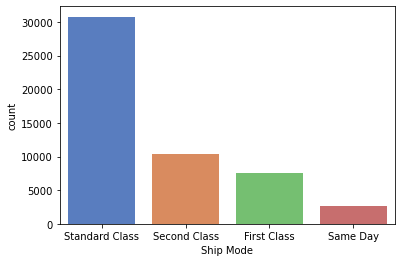


 count              51290
unique                 4
top       Standard Class
freq               30775
Name: Ship Mode, dtype: object 

Ship Mode  has:
------------------------------
Standard Class    30775
Second Class      10309
First Class        7505
Same Day           2701
Name: Ship Mode, dtype: int64

Missing values (%): 
------------------------------
0.0




In [144]:
#1. 'Ship Mode'

explore_categorical(categorical_data, 'Ship Mode')

Summary:

Segment
------------------------------ 

count        51290
unique           3
top       Consumer
freq         26518
Name: Segment, dtype: object 



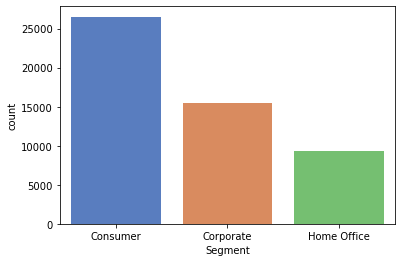


 count        51290
unique           3
top       Consumer
freq         26518
Name: Segment, dtype: object 

Segment  has:
------------------------------
Consumer       26518
Corporate      15429
Home Office     9343
Name: Segment, dtype: int64

Missing values (%): 
------------------------------
0.0




In [145]:
explore_categorical(categorical_data, 'Segment')

Summary:

Market
------------------------------ 

count     51290
unique        7
top        APAC
freq      11002
Name: Market, dtype: object 



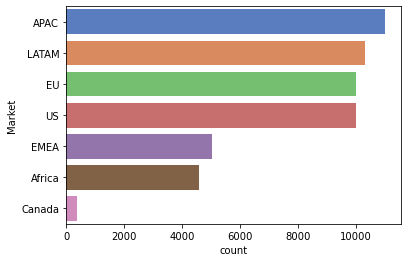


 count     51290
unique        7
top        APAC
freq      11002
Name: Market, dtype: object 

Market  has:
------------------------------
APAC      11002
LATAM     10294
EU        10000
US         9994
EMEA       5029
Africa     4587
Canada      384
Name: Market, dtype: int64

Missing values (%): 
------------------------------
0.0




In [146]:
explore_categorical(categorical_data, 'Market')

Summary:

Region
------------------------------ 

count       51290
unique         13
top       Central
freq        11117
Name: Region, dtype: object 



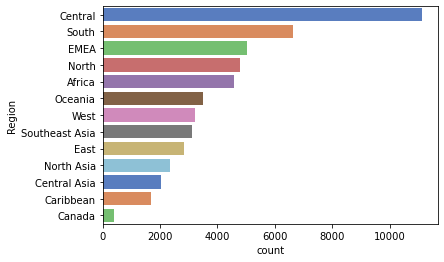


 count       51290
unique         13
top       Central
freq        11117
Name: Region, dtype: object 

Region  has:
------------------------------
Central           11117
South              6645
EMEA               5029
North              4785
Africa             4587
Oceania            3487
West               3203
Southeast Asia     3129
East               2848
North Asia         2338
Central Asia       2048
Caribbean          1690
Canada              384
Name: Region, dtype: int64

Missing values (%): 
------------------------------
0.0




In [147]:
explore_categorical(categorical_data, 'Region')

Summary:

Category
------------------------------ 

count               51290
unique                  3
top       Office Supplies
freq                31273
Name: Category, dtype: object 



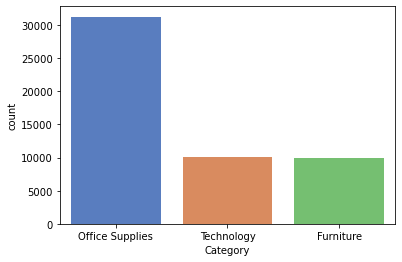


 count               51290
unique                  3
top       Office Supplies
freq                31273
Name: Category, dtype: object 

Category  has:
------------------------------
Office Supplies    31273
Technology         10141
Furniture           9876
Name: Category, dtype: int64

Missing values (%): 
------------------------------
0.0




In [148]:

explore_categorical(categorical_data, 'Category')


Summary:

Sub-Category
------------------------------ 

count       51290
unique         17
top       Binders
freq         6152
Name: Sub-Category, dtype: object 



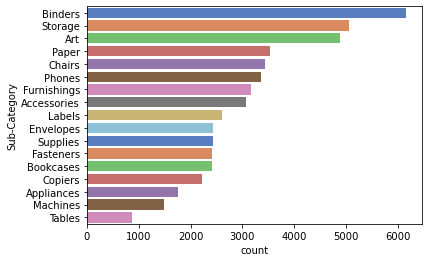


 count       51290
unique         17
top       Binders
freq         6152
Name: Sub-Category, dtype: object 

Sub-Category  has:
------------------------------
Binders        6152
Storage        5059
Art            4883
Paper          3538
Chairs         3434
Phones         3357
Furnishings    3170
Accessories    3075
Labels         2606
Envelopes      2435
Supplies       2425
Fasteners      2420
Bookcases      2411
Copiers        2223
Appliances     1755
Machines       1486
Tables          861
Name: Sub-Category, dtype: int64

Missing values (%): 
------------------------------
0.0




In [149]:

explore_categorical(categorical_data, 'Sub-Category')


Summary:

Order Priority
------------------------------ 

count      51290
unique         4
top       Medium
freq       29433
Name: Order Priority, dtype: object 



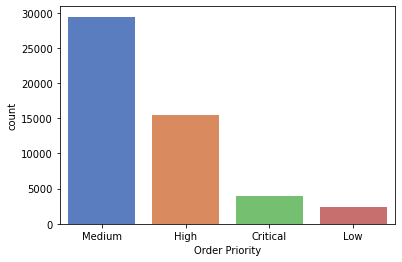


 count      51290
unique         4
top       Medium
freq       29433
Name: Order Priority, dtype: object 

Order Priority  has:
------------------------------
Medium      29433
High        15501
Critical     3932
Low          2424
Name: Order Priority, dtype: int64

Missing values (%): 
------------------------------
0.0




In [150]:

explore_categorical(categorical_data, 'Order Priority')


In [151]:
#Order ID

explore_categorical_max (categorical_data,'Order ID')

Summary:

Order ID
------------------------------ 

count              51290
unique             25035
top       CA-2014-100111
freq                  14
Name: Order ID, dtype: object 

The top 5 of  Order ID
------------------------------
CA-2014-100111    14
NI-2014-8880      13
TO-2014-9950      13
IN-2012-41261     13
IN-2013-42311     13
Name: Order ID, dtype: int64

Missing values (%): 
------------------------------
0.0




In [152]:
#Customer ID

explore_categorical_max (categorical_data,'Customer ID')

Summary:

Customer ID
------------------------------ 

count        51290
unique        1590
top       PO-18850
freq            97
Name: Customer ID, dtype: object 

The top 5 of  Customer ID
------------------------------
PO-18850    97
BE-11335    94
JG-15805    90
SW-20755    89
MY-18295    85
Name: Customer ID, dtype: int64

Missing values (%): 
------------------------------
0.0




In [153]:
#City

explore_categorical_max (categorical_data,'City')

Summary:

City
------------------------------ 

count             51290
unique             3636
top       New York City
freq                915
Name: City, dtype: object 

The top 5 of  City
------------------------------
New York City    915
Los Angeles      747
Philadelphia     537
San Francisco    510
Santo Domingo    443
Name: City, dtype: int64

Missing values (%): 
------------------------------
0.0




In [154]:
#State

explore_categorical_max (categorical_data,'State')

Summary:

State
------------------------------ 

count          51290
unique          1094
top       California
freq            2001
Name: State, dtype: object 

The top 5 of  State
------------------------------
California       2001
England          1499
New York         1128
Texas             985
Ile-de-France     981
Name: State, dtype: int64

Missing values (%): 
------------------------------
0.0




In [155]:
#Country

explore_categorical_max (categorical_data,'Country')

Summary:

Country
------------------------------ 

count             51290
unique              147
top       United States
freq               9994
Name: Country, dtype: object 

The top 5 of  Country
------------------------------
United States    9994
Australia        2837
France           2827
Mexico           2644
Germany          2065
Name: Country, dtype: int64

Missing values (%): 
------------------------------
0.0




In [156]:
#Product ID

explore_categorical_max (categorical_data,'Product ID')

Summary:

Product ID
------------------------------ 

count               51290
unique              10292
top       OFF-AR-10003651
freq                   35
Name: Product ID, dtype: object 

The top 5 of  Product ID
------------------------------
OFF-AR-10003651    35
OFF-AR-10003829    31
OFF-BI-10002799    30
OFF-BI-10003708    30
FUR-CH-10003354    28
Name: Product ID, dtype: int64

Missing values (%): 
------------------------------
0.0




In [157]:
#Product Name

explore_categorical_max (categorical_data,'Product Name')

Summary:

Product Name
------------------------------ 

count       51290
unique       3788
top       Staples
freq          227
Name: Product Name, dtype: object 

The top 5 of  Product Name
------------------------------
Staples                           227
Cardinal Index Tab, Clear          92
Eldon File Cart, Single Width      90
Rogers File Cart, Single Width     84
Ibico Index Tab, Clear             83
Name: Product Name, dtype: int64

Missing values (%): 
------------------------------
0.0




In [160]:
#Order Priority

explore_categorical_max (categorical_data,'Order Priority')

Summary:

Order Priority
------------------------------ 

count      51290
unique         4
top       Medium
freq       29433
Name: Order Priority, dtype: object 

The top 5 of  Order Priority
------------------------------
Medium      29433
High        15501
Critical     3932
Low          2424
Name: Order Priority, dtype: int64

Missing values (%): 
------------------------------
0.0




In [162]:
explore_categorical_max (categorical_data,'Order ID')

Summary:

Order ID
------------------------------ 

count              51290
unique             25035
top       CA-2014-100111
freq                  14
Name: Order ID, dtype: object 

The top 5 of  Order ID
------------------------------
CA-2014-100111    14
NI-2014-8880      13
TO-2014-9950      13
IN-2012-41261     13
IN-2013-42311     13
Name: Order ID, dtype: int64

Missing values (%): 
------------------------------
0.0




## Explore numeric columns

In [163]:
# Add unit price as anew columnn to the numeric_data

numeric_data['Unit_price'] = numeric_data['Sales']/numeric_data['Quantity']

In [165]:
#Loop through numeric_data to find column names

for col in numeric_data.columns:
    print (col)

Row ID
Sales
Quantity
Discount
Profit
Shipping Cost
Unit_price


In [166]:
numeric_data.drop(columns='Row ID', inplace=True)

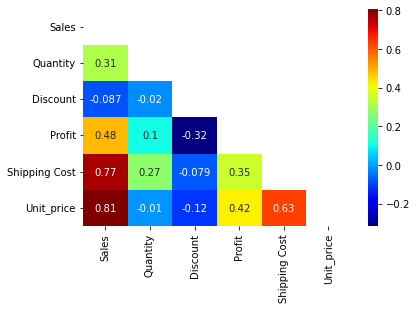

In [167]:
from pandas.plotting import scatter_matrix

# scatter_matrix(numeric_data, figsize=(15,10))
corr = numeric_data.corr()#.abs()
matrix = np.triu(corr)
sns.heatmap(corr,annot = True, cmap='jet', mask=matrix)

plt.show()

From the heatmap above, there is a high correlation between Sales and Unit_price, Sales and Shipping Cost, Shipping Cost and Unit_Price.

In [168]:
def explore_numeric (df, col):
    plt.figure(figsize = [10, 5])
    plt.subplot(1, 2, 1)

    x1=10**df[col]
    plt.xscale('log')
    plt.hist(x1, bins = np.geomspace(1, 10 ** 5, 100), density = True)
    
    plt.subplot(1, 2, 2)
    plt.boxplot(df[col])
    plt.show()
    
    print(df[col].describe())
    
#""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""
def explore_numeric_2 (df, col):
    plt.figure(figsize = [10, 5])
    plt.subplot(1, 2, 1)

    plt.hist(df[col])

    plt.subplot(1, 2, 2)
    plt.boxplot(df[col])
    plt.show()
    
    print(df[col].describe())

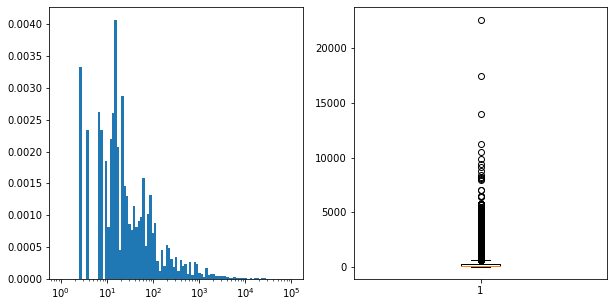

count    51290.000000
mean       246.490581
std        487.565361
min          0.444000
25%         30.758625
50%         85.053000
75%        251.053200
max      22638.480000
Name: Sales, dtype: float64


In [169]:
explore_numeric (numeric_data, 'Sales')

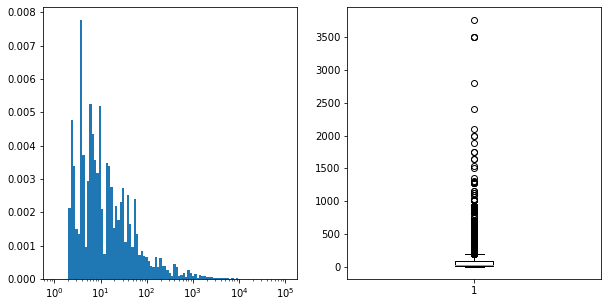

count    51290.000000
mean        71.657487
std        113.581515
min          0.336000
25%         11.799900
50%         29.400000
75%         82.160000
max       3773.080000
Name: Unit_price, dtype: float64


In [38]:
explore_numeric (numeric_data, 'Unit_price')

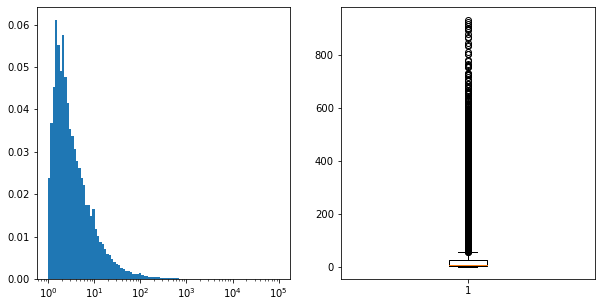

count    51290.000000
mean        26.375915
std         57.296804
min          0.000000
25%          2.610000
50%          7.790000
75%         24.450000
max        933.570000
Name: Shipping Cost, dtype: float64


In [39]:
explore_numeric (numeric_data, 'Shipping Cost')

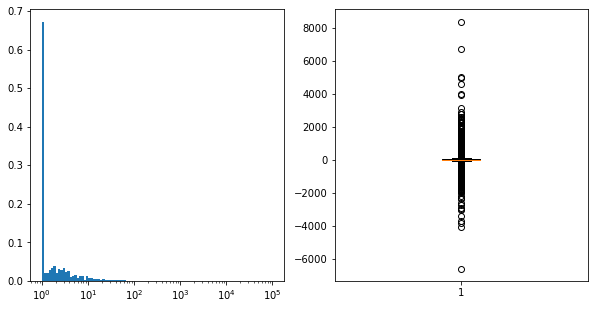

count    51290.000000
mean        28.610982
std        174.340972
min      -6599.978000
25%          0.000000
50%          9.240000
75%         36.810000
max       8399.976000
Name: Profit, dtype: float64


In [170]:
explore_numeric(numeric_data,'Profit')

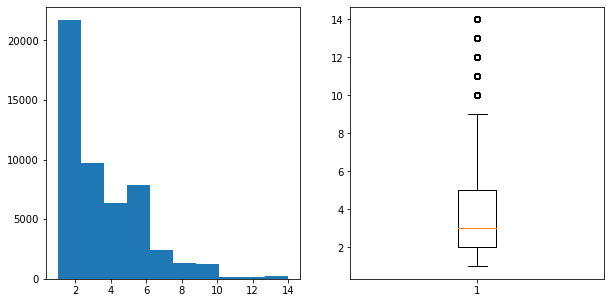

count    51290.000000
mean         3.476545
std          2.278766
min          1.000000
25%          2.000000
50%          3.000000
75%          5.000000
max         14.000000
Name: Quantity, dtype: float64


In [171]:
explore_numeric_2(numeric_data,'Quantity')

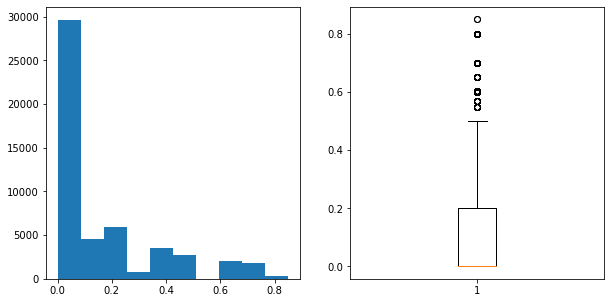

count    51290.000000
mean         0.142908
std          0.212280
min          0.000000
25%          0.000000
50%          0.000000
75%          0.200000
max          0.850000
Name: Discount, dtype: float64


In [172]:
explore_numeric_2(numeric_data,'Discount')

Nuemrical data has outliers which may affect interpretaion. Outliers will be handled appropriately.

## Explore Date columns

In [173]:
#Checking column names in date columns
for col in date_data.columns:
    print(col)

Order Date
Ship Date


- ### Transforming dates


In [174]:
date_data['Order Date'] = pd.to_datetime(date_data['Order Date'])
date_data['Ship Date'] = pd.to_datetime(date_data['Ship Date'])

weeks_ship = date_data['Ship Date'].dt.day_name()
months_order = date_data['Order Date'].dt.month_name()
months_ship = date_data['Ship Date'].dt.month_name()
years_order = date_data['Order Date'].dt.year
years_ship = date_data['Ship Date'].dt.year

date_data['Ship Weekday'] = weeks_ship
date_data['Order Date_M'] = months_order
date_data['Ship Date_M'] = months_ship
date_data['Order Date_Y'] = years_order
date_data['Ship Date_Y'] = years_ship


In [175]:
#Checking column names in date columns
for col in date_data.columns:
    print(col)

Order Date
Ship Date
Ship Weekday
Order Date_M
Ship Date_M
Order Date_Y
Ship Date_Y


In [176]:
date_data.head()

,Order Date,Ship Date,Ship Weekday,Order Date_M,Ship Date_M,Order Date_Y,Ship Date_Y
0,2011-01-01,2011-06-01,Wednesday,January,June,2011,2011
1,2011-01-01,2011-08-01,Monday,January,August,2011,2011
2,2011-01-01,2011-05-01,Sunday,January,May,2011,2011
3,2011-01-01,2011-05-01,Sunday,January,May,2011,2011
4,2011-01-01,2011-08-01,Monday,January,August,2011,2011


In [177]:
#Dropping original date columns: 'Order Date' and 'Ship Date'

# date_data.drop(columns=['Order Date', 'Ship Date'], inplace=True)

In [178]:
date_data.head()

,Order Date,Ship Date,Ship Weekday,Order Date_M,Ship Date_M,Order Date_Y,Ship Date_Y
0,2011-01-01,2011-06-01,Wednesday,January,June,2011,2011
1,2011-01-01,2011-08-01,Monday,January,August,2011,2011
2,2011-01-01,2011-05-01,Sunday,January,May,2011,2011
3,2011-01-01,2011-05-01,Sunday,January,May,2011,2011
4,2011-01-01,2011-08-01,Monday,January,August,2011,2011


In [179]:
# Finding the dates with the most transactions

for col in date_data.columns:
    print(col,':')
    print('-'*30)
    print(date_data[[col]].describe())
    print('-'*30)
    print(date_data[[col]].value_counts())
    print('='*30)

Order Date :
------------------------------
                 Order Date
count                 51290
unique                 1430
top     2014-06-18 00:00:00
freq                    135
first   2011-01-01 00:00:00
last    2014-12-31 00:00:00
------------------------------
Order Date
2014-06-18    135
2014-11-18    127
2014-03-09    126
2014-11-20    118
2014-12-29    116
             ... 
2011-04-24      1
2014-09-02      1
2013-10-11      1
2012-09-23      1
2012-07-15      1
Length: 1430, dtype: int64
Ship Date :
------------------------------
                  Ship Date
count                 51290
unique                 1464
top     2014-11-22 00:00:00
freq                    130
first   2011-01-02 00:00:00
last    2015-07-01 00:00:00
------------------------------
Ship Date 
2014-11-22    130
2014-07-09    115
2014-07-12    101
2014-11-17    101
2014-11-29    100
             ... 
2013-03-21      3
2015-07-01      3
2011-03-01      2
2011-05-01      2
2011-06-01      2
Length: 1464, 

In [180]:
# Joining all datasets together

new_df = pd.concat([date_data, categorical_data, numeric_data], join="inner", axis=1)

In [181]:
new_df.isnull().sum()

Order Date        0
Ship Date         0
Ship Weekday      0
Order Date_M      0
Ship Date_M       0
Order Date_Y      0
Ship Date_Y       0
Order ID          0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
City              0
State             0
Country           0
Market            0
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Order Priority    0
Sales             0
Quantity          0
Discount          0
Profit            0
Shipping Cost     0
Unit_price        0
dtype: int64

In [182]:
new_df.head()

,Order Date,Ship Date,Ship Weekday,Order Date_M,Ship Date_M,Order Date_Y,Ship Date_Y,Order ID,Ship Mode,Customer ID,Customer Name,Segment,City,State,Country,Market,Region,Product ID,Category,Sub-Category,Product Name,Order Priority,Sales,Quantity,Discount,Profit,Shipping Cost,Unit_price
0,2011-01-01,2011-06-01,Wednesday,January,June,2011,2011,AG-2011-2040,Standard Class,TB-11280,Toby Braunhardt,Consumer,Constantine,Constantine,Algeria,Africa,Africa,OFF-TEN-10000025,Office Supplies,Storage,"Tenex Lockers, Blue",Medium,408.300,2,0.0,106.140,35.46,204.150
1,2011-01-01,2011-08-01,Monday,January,August,2011,2011,IN-2011-47883,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,Australia,APAC,Oceania,OFF-SU-10000618,Office Supplies,Supplies,"Acme Trimmer, High Speed",Medium,120.366,3,0.1,36.036,9.72,40.122
2,2011-01-01,2011-05-01,Sunday,January,May,2011,2011,HU-2011-1220,Second Class,AT-735,Annie Thurman,Consumer,Budapest,Budapest,Hungary,EMEA,EMEA,OFF-TEN-10001585,Office Supplies,Storage,"Tenex Box, Single Width",High,66.120,4,0.0,29.640,8.17,16.530
3,2011-01-01,2011-05-01,Sunday,January,May,2011,2011,IT-2011-3647632,Second Class,EM-14140,Eugene Moren,Home Office,Stockholm,Stockholm,Sweden,EU,North,OFF-PA-10001492,Office Supplies,Paper,"Enermax Note Cards, Premium",High,44.865,3,0.5,-26.055,4.82,14.955
4,2011-01-01,2011-08-01,Monday,January,August,2011,2011,IN-2011-47883,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,Australia,APAC,Oceania,FUR-FU-10003447,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",Medium,113.670,5,0.1,37.770,4.70,22.734


In [183]:
#Comparing original data set and new_df set

print('Original data set had {} columns\nProcessed data set has {} columns'\
      .format(data.shape[1],new_df.shape[1]))


Original data set had 23 columns
Processed data set has 28 columns


# Analysis

## Hints on the analysis 

### Check: The following  possible questions may of interest to you.

1. What is the sales and profit per market? 

2. What is the most and least profitable market?

3. How are you going to increase the sales for the products that least bought?

4. Which month does the company records more sales?

5. What is the correlation between discount and sale?

6. Does the shipping cost affect the sales?

7. What is the dominant product category in each market?

8. City with most orders for a given product category?

9. which products are making loss?

10. Which segment provides more profit?

11. what is the correlation between quantity and profit?

12. what it the correlation between shipping cost and profit?

13. Which order priority yields more sales?

14. What is the average shipping cost to each region?

15. What product categories should be targetted to the  different markets?

16. Does the interval between the order date and the shipping date affect sale and profit


## 1. **What is the sales and profit per market?** 

 

**Target columns**
- Sales
- Unit_price
- profit
- Market
- Category
- Order date_M
- Order date_Y

In [184]:
#Average Sales and profit per market

sales_prf_mkt_df = new_df[['Sales','Profit', 'Market']].groupby('Market').mean()


In [185]:
##Average Sales and profit per market
# Sorted by Highest Sales

sals = sales_prf_mkt_df.sort_values('Sales', ascending=False)
sals

,Sales,Profit
Market,,
APAC,325.917481,39.629163
EU,293.808906,37.282974
US,229.858001,28.656896
LATAM,210.278334,21.531328
Canada,174.292109,46.399453
Africa,170.868370,19.374674
EMEA,160.302508,8.728966


The above shows the average sales and profit for each market.

In [186]:
##Average Sales and profit per market
# Sorted by Highest profit

prof = sales_prf_mkt_df.sort_values('Profit', ascending=False)
prof

,Sales,Profit
Market,,
Canada,174.292109,46.399453
APAC,325.917481,39.629163
EU,293.808906,37.282974
US,229.858001,28.656896
LATAM,210.278334,21.531328
Africa,170.868370,19.374674
EMEA,160.302508,8.728966


The above represents the average Sales and profit per market.

In [187]:
## Average Sales and profit of product category made in each market
piv = new_df[['Sales','Profit', 'Market', 'Category']]#.groupby('Market')

def pivot(df, col):
    tb1 = df.pivot_table(index = 'Market',values = col,columns = 'Category',
                            aggfunc='mean',margins =True,margins_name ='Average')

    return tb1.sort_values('Average', ascending=False)

In [188]:
#Average Sales of category in Markets

pivot(piv, 'Sales')

Category,Furniture,Office Supplies,Technology,Average
Market,,,,
APAC,553.286978,143.163321,566.565203,325.917481
EU,519.055996,158.796027,582.554444,293.808906
Average,416.248905,121.097120,467.858939,246.490581
US,349.834887,119.324101,452.709276,229.858001
LATAM,340.877674,96.199374,384.738446,210.278334
Canada,252.268571,108.426282,404.597077,174.292109
Africa,308.479612,87.604444,353.860640,170.868370
EMEA,296.910047,83.920531,312.738652,160.302508


- The table shows APAC as the market with the highest average sales of $325.917481, with Technology providing the highest sales of 566.56523  followed by Furniture
- However, the highest sales of Office Supplies was achieved  in EU market

In [189]:
#Total Profit of category in Markets

pivot(piv, 'Profit')

Category,Furniture,Office Supplies,Technology,Average
Market,,,,
Canada,62.220000,28.727545,111.486462,46.399453
APAC,51.830445,17.081114,85.389756,39.629163
EU,45.869513,24.238419,75.535423,37.282974
US,8.699327,20.327050,78.752002,28.656896
Average,28.878567,16.578961,65.454958,28.610982
LATAM,17.463350,13.554942,49.066690,21.531328
Africa,25.771926,9.353055,48.440717,19.374674
EMEA,14.979397,4.509976,18.185492,8.728966


###### Graphical representation of Sales and Profit in Each Market

In [190]:
def show_values(axs, orient="v", space=.01):
    def _single(ax):
        if orient == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height() + (p.get_height()*0.01)
                value = '{:.1f}'.format(p.get_height())
                ax.text(_x, _y, value, ha="center") 
        elif orient == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height() - (p.get_height()*0.5)
                value = '{:.1f}'.format(p.get_width())
                ax.text(_x, _y, value, ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _single(ax)
    else:
        _single(axs)

In [191]:
#Create pivot tables for markets and categories in terms of sales and profits

mkt_sal = new_df.pivot_table(index = 'Market',values = 'Sales',columns = 'Category',aggfunc='mean')
mkt_prof = new_df.pivot_table(index = 'Market',values = 'Profit',columns = 'Category',aggfunc='mean')

def my_ploting(val,title):
    width = 0.25
    ticks_1 = np.arange(len(val.index))
    ticks_2 = [i+width for i in ticks_1]
    ticks_3 = [i+width for i in ticks_2]
    plt.figure(figsize = (10,6))
    plt_1=plt.bar(ticks_1,val['Furniture'].values,width = width,color='#168028',label = 'Furniture')
    plt_2=plt.bar(ticks_2,val['Office Supplies'].values,width = width,color = '#FF0000',label = 'Office Supplies',)
    plt_3=plt.bar(ticks_3,val['Technology'].values,width = width,color = '#002840',label = 'Technology',)
    plt.xticks(ticks_1+width,val.index,rotation = 45,fontsize = '16')

    def value_label(plot):
        """Attach a text label above each bar in plot, displaying its height."""
        for bar in plot:
            height = round(bar.get_height())
            plt.annotate('{}'.format(height),
                        xy=(bar.get_x() + bar.get_width() / 2, height),
                        xytext=(0, 3),  # 3 points vertical offset
                        textcoords="offset points",
                        ha='center', va='bottom',color ='black')
    

    value_label(plt_1)
    value_label(plt_2)
    value_label(plt_3)
    plt.xlabel('Market')
    if 'Sales' in title:
        plt.ylabel('Sales')
    else:
        plt.ylabel('Profit')
    plt.title(title)
    plt.legend()
    plt.show()

In [192]:
sals = sales_prf_mkt_df.sort_values('Sales', ascending=False)
prof = sales_prf_mkt_df.sort_values('Profit', ascending=False)

def sals_prof_bar(df, col):
    plt.figure(figsize = [20, 3])

    plt.subplot(1, 2, 1)
    p = sns.barplot(x=df[col], y=df.index, data=df, color="blue", saturation=.5)
    #show values on barplot
    show_values(p, "h", space=0)
    plt.title('Average {} in Markets (2011-2014)'.format(col))

    plt.tight_layout()
    plt.show()

In [193]:
# Compare Sales and profit Trends in the past 2 years (2013-2014)

sal_prof_date = new_df[['Order Date_Y', 'Order Date_M', 'Sales', 'Profit']]\
.groupby(['Order Date_Y', 'Order Date_M'], sort=False).mean()

def trends(df, col):

    y_2013 = df.loc[2013][[col]]
    y_2014 = df.loc[2014][[col]]
   
    fig, ax = plt.subplots(figsize=(10,5))
    
    plt_1 = ax.bar(y_2014.index, y_2014[col])
    ax.plot(y_2013.index, y_2013[col], label=2013)
    ax.plot(y_2014.index, y_2014[col], label=2014)
    
    plt.title('{} trend in 2013 and 2014'.format(col))
    def value_label(plot):
        """Attach a text label above each bar in plot, displaying its height."""
        for bar in plot:
            height = round(bar.get_height())
            plt.annotate('{}'.format(height),
                        xy=(bar.get_x() + bar.get_width() / 2, height),
                        xytext=(0, 3),  # 3 points vertical offset
                        textcoords="offset points",
                        ha='center', va='bottom',color ='black')
            
    
    value_label(plt_1)
    ax.legend(loc='upper right')
    plt.xlabel('Month')
    plt.ylabel(col)
    plt.tight_layout()
    plt.xticks(rotation=430)
    plt.show()

## 4. Which month does the company records more sales?

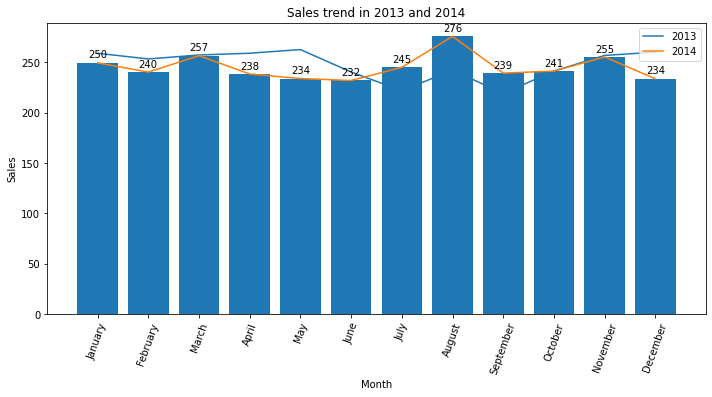

In [194]:
#Sales trends in 2013, 2014

trends(sal_prof_date, 'Sales')

In [195]:
# Sales in 2014

new_df[new_df['Order Date_Y']==2014][['Sales', 'Order Date_M']].groupby('Order Date_M').mean()\
.sort_values('Sales', ascending=False)

,Sales
Order Date_M,
August,275.800537
March,256.620641
November,255.371165
January,249.549323
July,245.094260
October,241.340899
February,240.314276
September,239.336898
April,238.462936


In [196]:
# Sales in 2013

new_df[new_df['Order Date_Y']==2013][['Sales', 'Order Date_M']].groupby('Order Date_M').mean()\
.sort_values('Sales', ascending=False)

,Sales
Order Date_M,
May,262.735085
December,260.157960
April,259.090387
January,259.045415
March,257.307807
November,256.900880
February,253.398902
August,242.241292
October,241.395778


- In 2014, the company recorded its highest sales of 276.8 (on average) in Auguest as can be seen in both the table and the bar graph
- However, the highest avearge sales of 262.7 in 2013 was made
- This indicates that the company is making yearly improvement in its sales performance.
- Detailed analysis is needed to identify which markets, or products  has these highest sales in those months

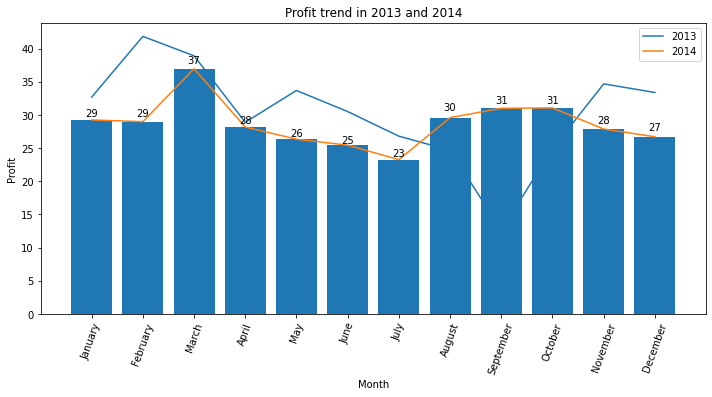

In [197]:
#Profit trends in 2013, 2014

trends(sal_prof_date, 'Profit')

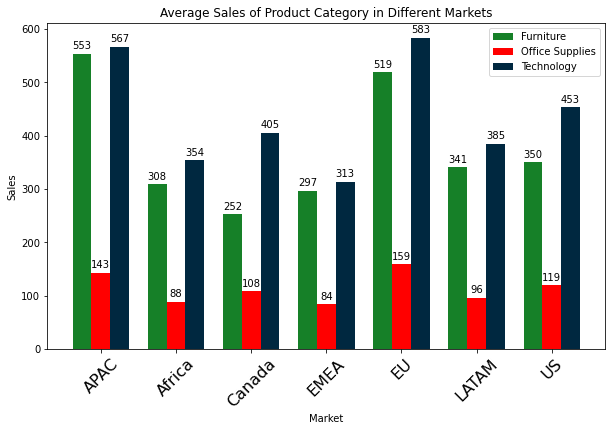

None


In [198]:
print(my_ploting(mkt_sal, 'Average Sales of Product Category in Different Markets'))


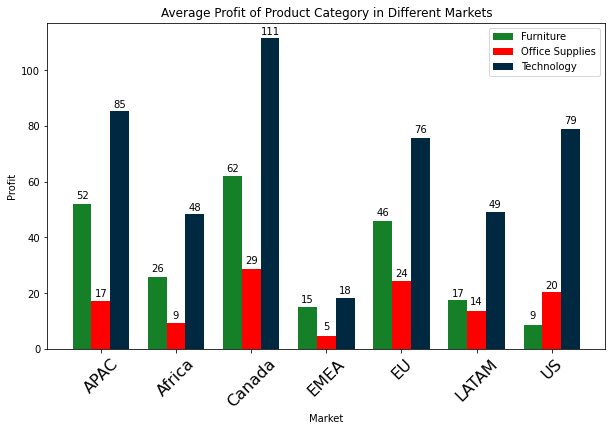

None


In [199]:
print(my_ploting(mkt_prof, 'Average Profit of Product Category in Different Markets'))

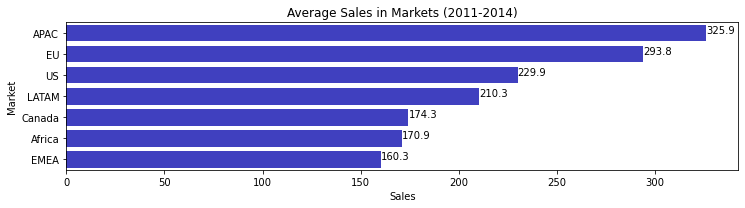

In [200]:
#Average Sales in markert from 2011-2014

sals_prof_bar(sals, 'Sales')

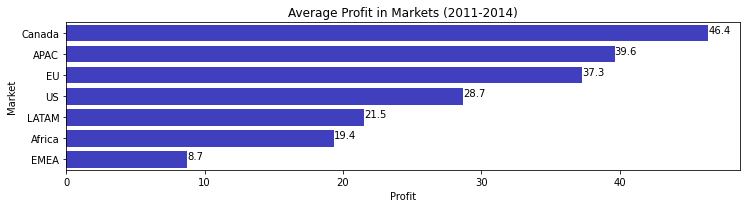

In [201]:
#Average profit in markert from 2011-2014


sals_prof_bar(prof, 'Profit')

## 2. **What is the most and least profitable market??** 


- In total, the most profitable market is Canada with Technology being the most profitable category and least profitable market is EMEA with office supplies being least profitable product category. 


## 2. **How are you going to increase the sales for the products that least bought?** 


- The least bought products in each market are Office Supplies
- Analysis on how other factors, such as discount, shipping mode, and unit price impact the sales of these products is required

**Target columns**
- Sales
- Unit_price
- Unit cost
- Market
- Order date_M
- Order date_Y

In [202]:
# Obtain data on office supplies
#
office_sup_df = new_df[new_df['Category']=='Office Supplies']

# Add Unit cost to the office supply data frame
office_sup_df['Unit_cost'] = (office_sup_df['Sales'] - office_sup_df['Profit'])/office_sup_df['Quantity']

#pick only target columns
office_sup = office_sup_df[['Sales','Unit_price', 'Discount','Market','Order Date_M','Order Date_Y']]

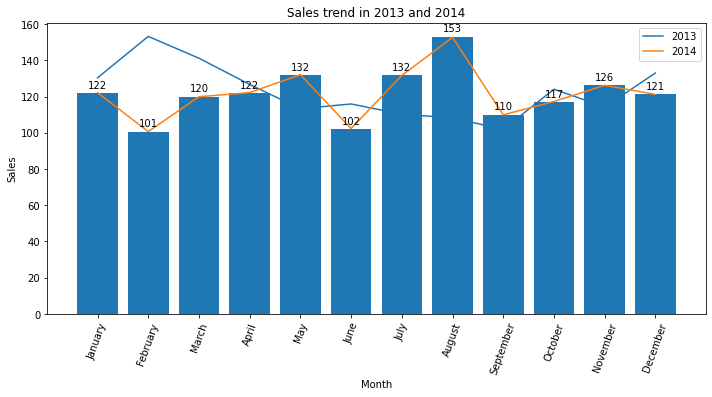

In [203]:
# Sales trend of office supplies in 2013, 2014

office_sup_date = office_sup[['Order Date_Y', 'Order Date_M', 'Sales']]\
.groupby(['Order Date_Y', 'Order Date_M'], sort=False).mean()

trends(office_sup_date, 'Sales')

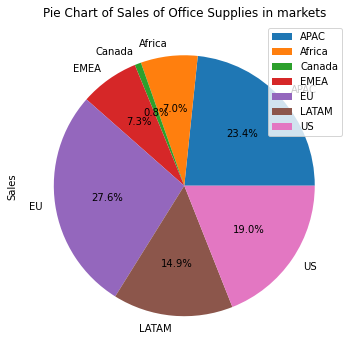

In [204]:
# Get a Pie Chart to display percentage of sales in each market

pie_sup = office_sup[['Market', 'Sales']].groupby('Market').sum()

pie_sup.plot.pie(subplots=True, autopct="%.1f%%", figsize=(6, 6))

plt.title('Pie Chart of Sales of Office Supplies in markets')
plt.show()

## 5. What is the correlation between discount and sale?

In [205]:
discount_sales = data[['Sales','Discount']].corr()#.abs()
discount_sales

,Sales,Discount
Sales,1.000000,-0.086722
Discount,-0.086722,1.000000


# 6. Does the shipping cost affect the sales?

In [254]:
scipy.stats.pearsonr(new_df['Shipping Cost'], new_df['Sales'])

(0.7680728376889521, 0.0)

co-efficient = 0.7680728376889521

p-value = 0.0

Though there is a strong positive cporeelation between Shipping Cost and Sales, the pearson correlation test indicates that the p-value of 0.0 is less than 0.05 suggesting that Shipping Cost does not affect Sales.

There is a strong positive correlation between Sales and Shipping Cost. This indicates that an increase in shipping cost can highly improve sales in a particular market.

# 11. what is the correlation between quantity and profit?

In [207]:
quantity_profit = data[['Quantity','Profit']].corr()#.abs()
quantity_profit

,Quantity,Profit
Quantity,1.000000,0.104365
Profit,0.104365,1.000000


There is a weak positive correlation between Quantity and Proft.

# 12. what it the correlation between shipping cost and profit?

In [208]:
ship_profit = data[['Shipping Cost','Profit']].corr()#.abs()
ship_profit

,Shipping Cost,Profit
Shipping Cost,1.000000,0.354441
Profit,0.354441,1.000000


There is a positive correlation between Shipping Cost and Proft.

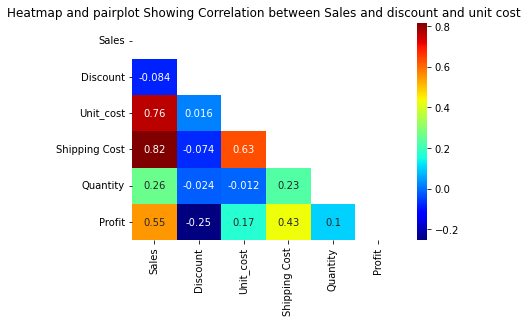

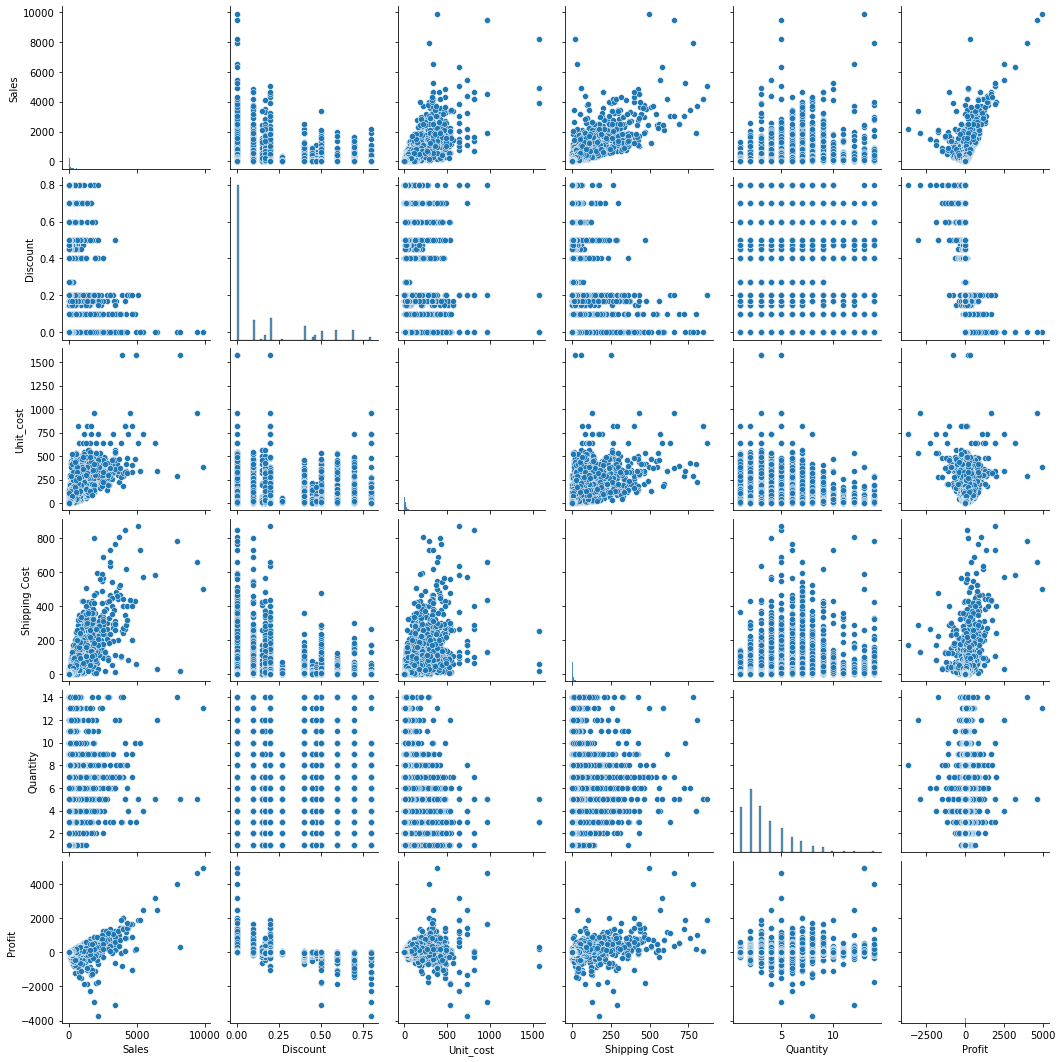

In [209]:
# identify How discount and 'Unit_cost' correlate with sales

corr = office_sup_df[['Sales','Discount','Unit_cost', 'Shipping Cost', 'Quantity', 'Profit']].corr()#.abs()
matrix = np.triu(corr)
sns.heatmap(corr,annot = True, cmap='jet', mask=matrix)
plt.title('Heatmap and pairplot Showing Correlation between Sales and discount and unit cost ')

sns.pairplot(office_sup_df[['Sales','Discount','Unit_cost', 'Shipping Cost', 'Quantity', 'Profit']])

plt.show()

**The graphs indicate that**
1. There is a weak negative correlation between discount and sales. Thus increasing discount could lead to a small reduction in sales 
2. There is strong positive correlation between shipping cost and sales
3. There is a weak correlation of 0.1 between quantity and profit
4. There is almost moderate positive correlation bwteen shipping cost and profit

In [210]:
# Display discount and unit cost in the markets

office_sup_df[['Market','Discount','Unit_cost']].groupby('Market').mean().sort_values('Unit_cost')

,Discount,Unit_cost
Market,,
LATAM,0.115404,22.318700
US,0.157285,26.336517
APAC,0.157793,32.768766
Africa,0.156158,34.908522
EU,0.087403,35.381000
EMEA,0.196178,35.827070
Canada,0.000000,37.606895


In [211]:
#Find the shipping mode used in Canada

office_sup_df[office_sup_df['Market']=='Canada'][['Ship Mode']].value_counts()

Ship Mode     
Standard Class    144
Second Class       61
First Class        48
Same Day           24
dtype: int64

### Recommendation on increasing sales of least bought products
- Canada is not making enough sales because of its choice of ship mode. Standard Class usually does not ensure quick response to customers' demand due to the longer time it takes to transport goods. The heatmap result indicates that high shipping cost has strong positive correlation with sales. Therefore, Sales of Office supplies can be increase by chosing quick and fairly expensive mode of shipment, such as 'Same day or 'First Class'. Shipping cost should not be a worry because of the positive correlation it has with profit
- Since there is currently zero discount in Canada for office supplies, being the least bought products, it is recommended that adequate discount is given to customers. Though, discount has a negative correlation with sales, its actual impact is very small. Further investigation into its significance is recommneded.

## 7. What is the dominant product category in each market?

In [212]:
market_prod = data[['Market','Category']].groupby('Market')['Category'].value_counts()
pd.DataFrame(market_prod)

Category
Market Category                 
APAC   Office Supplies      6177
       Furniture            2429
       Technology           2396
Africa Office Supplies      3045
       Technology            911
       Furniture             631
Canada Office Supplies       277
       Technology             65
       Furniture              42
EMEA   Office Supplies      3297
       Technology            962
       Furniture             770
EU     Office Supplies      6589
       Technology           1910
       Furniture            1501
LATAM  Office Supplies      5862
       Furniture            2382
       Technology           2050
US     Office Supplies      6026
       Furniture            2121
       Technology           1847

From the analysis Office Supplies is the dominant category for each of the markets.

## 8. City with most orders for a given product category?

In [213]:
city_prod = data[['City','Category']].groupby('City')['Category'].value_counts()
pd.DataFrame(city_prod)

Category
City                  Category                 
Aachen                Office Supplies        14
                      Furniture               2
                      Technology              1
Aalen                 Furniture               1
Aalst                 Office Supplies         3
...                                         ...
Zwedru                Office Supplies         1
Zwickau               Office Supplies         3
Zwolle                Office Supplies         2
eMbalenhle            Office Supplies         2
Águas Lindas de Goiás Office Supplies         4

[8079 rows x 1 columns]

Aachen is the city with most orders with product category of Office Supplies

## 9. which products are making loss?

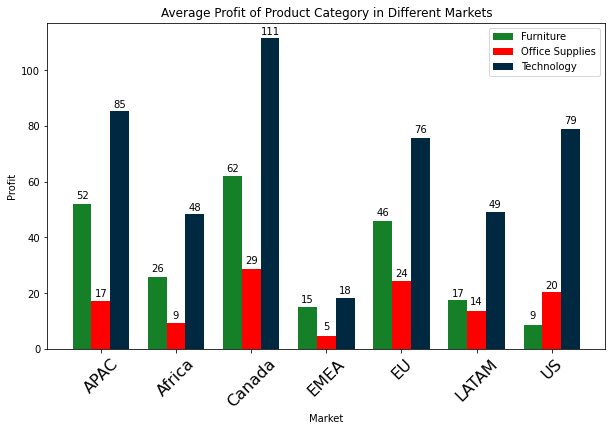

None


In [214]:
print(my_ploting(mkt_prof, 'Average Profit of Product Category in Different Markets'))

From the above chart, Office Supplies is making losses in all markets except US which has furniture creating losses.

## 10.Which segment provides more profit?

In [215]:
profit_seg = data[['Segment','Profit']].groupby('Segment')['Profit'].sum().sort_values()
pd.DataFrame(profit_seg)

,Profit
Segment,
Home Office,277009.18056
Corporate,441208.32866
Consumer,749239.78206


From the table, the Consumer Segment provides the most profit of $749239.78206


## 13. Which order priority yields more sales?


In [216]:
sales_order = data[['Order Priority','Sales']].groupby('Order Priority')['Sales'].sum().sort_values()
pd.DataFrame(sales_order)

,Sales
Order Priority,
Low,5.678259e+05
Critical,9.862355e+05
High,3.807548e+06
Medium,7.280892e+06


From the above table and analysis, products with Critical Priority provide more sales.

## 14. What is the average shipping cost to each region?


In [217]:
reg_cost = data[['Region','Shipping Cost']].groupby('Region')['Shipping Cost'].mean().sort_values()
pd.DataFrame(reg_cost)

,Shipping Cost
Region,
EMEA,17.573221
Africa,19.215058
Canada,19.285495
Caribbean,21.059260
West,23.887687
South,25.353509
East,25.542001
Central,26.710494
North,27.476299


The above table and analysis displays the average shipping cost for each of the regions.


## 15. What product categories should be targetted to the  different markets?


In [218]:
target_cat = data[['Market','Category']].groupby('Market')['Category'].value_counts()
pd.DataFrame(target_cat)

Category
Market Category                 
APAC   Office Supplies      6177
       Furniture            2429
       Technology           2396
Africa Office Supplies      3045
       Technology            911
       Furniture             631
Canada Office Supplies       277
       Technology             65
       Furniture              42
EMEA   Office Supplies      3297
       Technology            962
       Furniture             770
EU     Office Supplies      6589
       Technology           1910
       Furniture            1501
LATAM  Office Supplies      5862
       Furniture            2382
       Technology           2050
US     Office Supplies      6026
       Furniture            2121
       Technology           1847

From the analysis, APAC, LATAM and US markets may concentrate on Technology, Africa , Canada, EMEA and EU markets may focus on furniture.

## 16. Does the interval between the order date and the shipping date affect sale and profit

In [250]:
new_df['lead_time'] = new_df['Ship Date']-new_df['Order Date']

In [251]:
new_df.head(5)

,Order Date,Ship Date,Ship Weekday,Order Date_M,Ship Date_M,Order Date_Y,Ship Date_Y,Order ID,Ship Mode,Customer ID,Customer Name,Segment,City,State,Country,Market,Region,Product ID,Category,Sub-Category,Product Name,Order Priority,Sales,Quantity,Discount,Profit,Shipping Cost,Unit_price,lead_time
0,2011-01-01,2011-06-01,Wednesday,January,June,2011,2011,AG-2011-2040,Standard Class,TB-11280,Toby Braunhardt,Consumer,Constantine,Constantine,Algeria,Africa,Africa,OFF-TEN-10000025,Office Supplies,Storage,"Tenex Lockers, Blue",Medium,408.300,2,0.0,106.140,35.46,204.150,151 days
1,2011-01-01,2011-08-01,Monday,January,August,2011,2011,IN-2011-47883,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,Australia,APAC,Oceania,OFF-SU-10000618,Office Supplies,Supplies,"Acme Trimmer, High Speed",Medium,120.366,3,0.1,36.036,9.72,40.122,212 days
2,2011-01-01,2011-05-01,Sunday,January,May,2011,2011,HU-2011-1220,Second Class,AT-735,Annie Thurman,Consumer,Budapest,Budapest,Hungary,EMEA,EMEA,OFF-TEN-10001585,Office Supplies,Storage,"Tenex Box, Single Width",High,66.120,4,0.0,29.640,8.17,16.530,120 days
3,2011-01-01,2011-05-01,Sunday,January,May,2011,2011,IT-2011-3647632,Second Class,EM-14140,Eugene Moren,Home Office,Stockholm,Stockholm,Sweden,EU,North,OFF-PA-10001492,Office Supplies,Paper,"Enermax Note Cards, Premium",High,44.865,3,0.5,-26.055,4.82,14.955,120 days
4,2011-01-01,2011-08-01,Monday,January,August,2011,2011,IN-2011-47883,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,Australia,APAC,Oceania,FUR-FU-10003447,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",Medium,113.670,5,0.1,37.770,4.70,22.734,212 days


In [252]:
from datetime import date

In [240]:
new_df['lead_time']=(new_df['lead_time']).dt.days

In [241]:
new_df.head(5)

,Order Date,Ship Date,Ship Weekday,Order Date_M,Ship Date_M,Order Date_Y,Ship Date_Y,Order ID,Ship Mode,Customer ID,Customer Name,Segment,City,State,Country,Market,Region,Product ID,Category,Sub-Category,Product Name,Order Priority,Sales,Quantity,Discount,Profit,Shipping Cost,Unit_price,lead_time
0,2011-01-01,2011-06-01,Wednesday,January,June,2011,2011,AG-2011-2040,Standard Class,TB-11280,Toby Braunhardt,Consumer,Constantine,Constantine,Algeria,Africa,Africa,OFF-TEN-10000025,Office Supplies,Storage,"Tenex Lockers, Blue",Medium,408.300,2,0.0,106.140,35.46,204.150,151
1,2011-01-01,2011-08-01,Monday,January,August,2011,2011,IN-2011-47883,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,Australia,APAC,Oceania,OFF-SU-10000618,Office Supplies,Supplies,"Acme Trimmer, High Speed",Medium,120.366,3,0.1,36.036,9.72,40.122,212
2,2011-01-01,2011-05-01,Sunday,January,May,2011,2011,HU-2011-1220,Second Class,AT-735,Annie Thurman,Consumer,Budapest,Budapest,Hungary,EMEA,EMEA,OFF-TEN-10001585,Office Supplies,Storage,"Tenex Box, Single Width",High,66.120,4,0.0,29.640,8.17,16.530,120
3,2011-01-01,2011-05-01,Sunday,January,May,2011,2011,IT-2011-3647632,Second Class,EM-14140,Eugene Moren,Home Office,Stockholm,Stockholm,Sweden,EU,North,OFF-PA-10001492,Office Supplies,Paper,"Enermax Note Cards, Premium",High,44.865,3,0.5,-26.055,4.82,14.955,120
4,2011-01-01,2011-08-01,Monday,January,August,2011,2011,IN-2011-47883,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,Australia,APAC,Oceania,FUR-FU-10003447,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",Medium,113.670,5,0.1,37.770,4.70,22.734,212


In [243]:
lead = new_df[['Sales','Profit','lead_time']].corr()#.abs()
lead

,Sales,Profit,lead_time
Sales,1.000000,0.484918,-0.001210
Profit,0.484918,1.000000,0.007117
lead_time,-0.001210,0.007117,1.000000


In [244]:
import scipy.stats

In [246]:
scipy.stats.pearsonr(new_df['Sales'], new_df['lead_time'])

(-0.0012095433926583954, 0.7841443398735443)

co-efficient = -0.0012095433926583954

p-value = 0.7841443398735443 

Based on pearson's correlation test, the difference between Ship Date and Order Date affect Sales negatively since the p-value is greater than 0.05.

In [248]:
scipy.stats.pearsonr(new_df['Profit'], new_df['lead_time'])

(0.007116877652546665, 0.10701385984546792)

co-efficient = 0.007116877652546665  

p-value = 0.10701385984546792

Based on pearson's correlation test, the difference between Ship Date and Order Date affect Profit positively since the p-value is greater than 0.05.

Further investigation will identify why delay in response to customers' orders generate more profit for the organization.